# Prashant Dutt

## Research question/interests
How does seasonality effect various stocks and ETFs in the market? <br>
Which sectors/ stocks/ ETFS are most sensitive and least sensitve to seasonality?

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sns.set_theme(style="ticks", font_scale=1)
plt.rc("axes.spines", top=False, right=False)


Let's load a data set. I've chosen RETL - Direxion Daily Retail Bull 3x Shares:

*"RETL, as a levered product, is a short-term tactical instrument and not a buy-and-hold ETF. Like many levered funds, it promises 3x exposure only for one day. Over longer periods, returns can vary significantly from 3x exposure to its underlying index. Investors should note that RETL's underlying index may have a different take on the retail space than other indexes. The fund tends to overweight apparel, auto-parts & service and specialty retailers, while underweighting department stores. RETL’s exposure also extends to some unexpected sectors like oil & gas refining and marketing. As a short-term product, trading costs are relatively more important for the fund, than with buy-and-hold ETFs. Note: On December 1, 2016, RETL changed its underlying index from Russell 1000 Retail Index to S&P Retail Select Industry Index."*

In [39]:
RETL = pd.read_csv("../data/raw/archive/ETFs/retl.us.txt", sep=",", header=0, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
RETL.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-14,3.0042,3.0842,3.0042,3.0283,923050,0
1,2010-07-15,3.0314,3.0788,3.0251,3.0717,1225763,0
2,2010-07-16,2.9498,2.9520,2.8828,2.8937,773018,0
3,2010-07-19,2.8696,2.8696,2.8588,2.8634,147921,0
4,2010-07-20,2.8409,2.9708,2.8409,2.9708,54019,0


First, let's remove OpenInt from the dataset.

In [40]:
RETL.drop(columns=['OpenInt'], inplace=True)
RETL.head()

,Date,Open,High,Low,Close,Volume
0,2010-07-14,3.0042,3.0842,3.0042,3.0283,923050
1,2010-07-15,3.0314,3.0788,3.0251,3.0717,1225763
2,2010-07-16,2.9498,2.9520,2.8828,2.8937,773018
3,2010-07-19,2.8696,2.8696,2.8588,2.8634,147921
4,2010-07-20,2.8409,2.9708,2.8409,2.9708,54019


Next, we examine the datatypes of the vaious components.

In [41]:
RETL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1782 non-null   object 
 1   Open    1782 non-null   float64
 2   High    1782 non-null   float64
 3   Low     1782 non-null   float64
 4   Close   1782 non-null   float64
 5   Volume  1782 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 83.7+ KB


It looks like the Data column is being treated as a string rather than as a date. Let's fix this.

In [42]:
RETL['Date'] = RETL['Date'].apply(pd.to_datetime)
RETL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1782 non-null   datetime64[ns]
 1   Open    1782 non-null   float64       
 2   High    1782 non-null   float64       
 3   Low     1782 non-null   float64       
 4   Close   1782 non-null   float64       
 5   Volume  1782 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 83.7 KB


Next we want to make the Date column the index column.

In [43]:
RETL.set_index('Date', inplace = True)
RETL.reset_index().head()

,Date,Open,High,Low,Close,Volume
0,2010-07-14,3.0042,3.0842,3.0042,3.0283,923050
1,2010-07-15,3.0314,3.0788,3.0251,3.0717,1225763
2,2010-07-16,2.9498,2.9520,2.8828,2.8937,773018
3,2010-07-19,2.8696,2.8696,2.8588,2.8634,147921
4,2010-07-20,2.8409,2.9708,2.8409,2.9708,54019


From this data we can see that the **Open** and **Close** columns show the opening and closing price of the ETF on a particular day.

The **High** and **Low** columns provide the highest and lowest price for the ETF on a partiular day, respectively.

The **Volume** column shows the total volume of the ETF traded on a particular day.

**Note:** Since we don't have Adjusted Closing Price in our data set, we will use the **Close** column to perform a detailed analysis.



Let's take a look at a plot of closing prices over the years for RETL.

Text(0.5, 1.0, 'RETL Closing Prices')

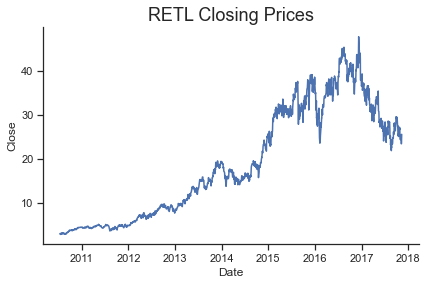

In [44]:
sns.lineplot(data=RETL, x="Date", y="Close", palette='pastel').set_title('RETL Closing Prices', fontsize = 18)

It looks like RETL more or less had a steady increase in its ETF over 2011-2017, followed by a drop from 2017 to 2018. 

Let's use pandas to analyse and manipulare this data to gain insights.

Let's use 